##**Importing the Libraries**

In [392]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

##**Load the Data from Kaggle**

In [ ]:
%%bash
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle
chmod 600 ~/.kaggle/kaggle.json

In [504]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip titanic

###**Turn csv files into Pandas DataFrame**

In [506]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

##**Data Preprocessing**

In [394]:
train_data.shape

(891, 12)

In [507]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [396]:
print(train_data.shape,
test_data.shape)

(183, 12) (87, 11)


In [473]:
test_data
test_columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]

In [398]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


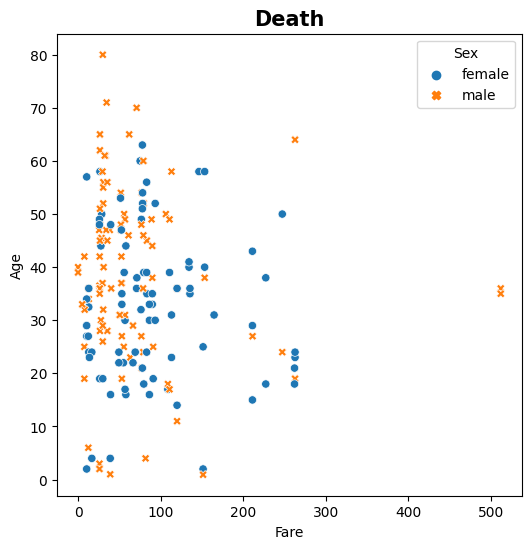

<Figure size 640x480 with 0 Axes>

In [387]:
plt.figure(figsize = (6, 6))

plt.title("Death", fontsize = 15, fontweight = "bold")
sns.scatterplot(
    data = train_data, x = "Fare", y = "Age", hue = "Sex",
    style = "Sex"
)

plt.show()
plt.savefig("fig.png")

In [508]:
drop_sec = ["Survived", "PassengerId", "Name", "Ticket"]
x = train_data.drop(drop_sec, axis = 1)
y = train_data["Survived"]

In [389]:
y.isnull().sum()

0

In [509]:
from sklearn.preprocessing import OrdinalEncoder
model_o = OrdinalEncoder()
x = model_o.fit_transform(x)

In [403]:
x.shape

(183, 8)

In [510]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, shuffle = True)

In [405]:
print(x_val.shape, y_val.shape)

(37, 8) (37,)


#**Train a model with Sklearn Models (3 Different Model)**

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

###Logistic Regression Model

In [77]:
model_Logistic = LogisticRegression()
model_Logistic.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
y_pred = model_Logistic.predict(x_val)
acc = accuracy_score(y_pred, y_val)
acc

0.6756756756756757

###RandomForestClassifier Model

In [104]:
model_Ran = RandomForestClassifier()
model_Ran.fit(x_train, y_train)

RandomForestClassifier()

In [105]:
y_pred1 = model_Ran.predict(x_val)
acc1 = accuracy_score(y_pred1, y_val)
acc1

0.8108108108108109

In [187]:
test_data = test_data.dropna()
test_data = test_data.drop(drop_sec, axis = 1)
testd = testing.fit_transform(test_dataw
tst1 = model_Ran.predict(testd)

In [176]:
tst1_df = pd.DataFrame(tst1, columns = ["Survived"])
tst1_df.to_csv("tst.csv", index = False)

###SVC Model

In [118]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [119]:
y_pred2 = model_svc.predict(x_val)
acc2 = accuracy_score(y_pred2, y_val)
acc2

0.6756756756756757

###DecisionTreeClassifier Model

In [132]:
model_dec = DecisionTreeClassifier()
model_dec.fit(x_train, y_train)

DecisionTreeClassifier()

In [133]:
y_pred3 = model_dec.predict(x_val)
acc3 = accuracy_score(y_pred3, y_val)
acc3

0.8108108108108109

##PyTorch Model

In [488]:
x_train.squeeze()

tensor([[  0.,   0.,  10.,  ...,  76.,  65.,   0.],
        [  0.,   1.,  23.,  ...,  49.,  15.,   2.],
        [  2.,   1.,  36.,  ...,   2., 126.,   2.],
        ...,
        [  0.,   1.,  20.,  ...,  31.,  10.,   2.],
        [  0.,   1.,  16.,  ...,  89.,  31.,   0.],
        [  0.,   1.,  28.,  ...,  15., 108.,   2.]], device='cuda:0')

In [492]:
class CustomDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y


y_train_tensor = torch.from_numpy(y_train.values)


train_data = CustomDataset(x_train, y_train_tensor)

In [491]:
x_train = x_train.reshape(146, 8)

In [493]:
train_dataloader = DataLoader(train_data, batch_size = 64)

In [375]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [545]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = 8
hidden_size = 16
output_size = 1

net = Net(input_size, hidden_size, output_size).to(device)

In [546]:
X_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train.values).float().to(device)


train_data = CustomDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=16)


criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)


num_epochs = 100
for epoch in range(num_epochs):
    size = 100
    for batch, (inputs, labels) in enumerate(train_loader):

        optimizer.zero_grad()


        outputs = net(inputs)
        loss = criterion(outputs.squeeze(), labels)


        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

loss: 1.444459  [    1/  100]
loss: 0.692150  [    1/  100]
loss: 0.690866  [    1/  100]
loss: 0.696265  [    1/  100]
loss: 0.692677  [    1/  100]
loss: 0.698816  [    1/  100]
loss: 0.704434  [    1/  100]
loss: 0.709238  [    1/  100]
loss: 0.713098  [    1/  100]
loss: 0.715977  [    1/  100]
loss: 0.717918  [    1/  100]
loss: 0.719036  [    1/  100]
loss: 0.719494  [    1/  100]
loss: 0.719283  [    1/  100]
loss: 0.713539  [    1/  100]
loss: 0.685156  [    1/  100]
loss: 0.682544  [    1/  100]
loss: 0.696153  [    1/  100]
loss: 0.778471  [    1/  100]
loss: 0.752533  [    1/  100]
loss: 0.741112  [    1/  100]
loss: 0.730825  [    1/  100]
loss: 0.714785  [    1/  100]
loss: 0.689915  [    1/  100]
loss: 0.676073  [    1/  100]
loss: 0.727026  [    1/  100]
loss: 0.702553  [    1/  100]
loss: 0.688548  [    1/  100]
loss: 0.676490  [    1/  100]
loss: 0.669554  [    1/  100]
loss: 0.679261  [    1/  100]
loss: 0.681559  [    1/  100]
loss: 0.741605  [    1/  100]
loss: 0.73

In [547]:
X_val_tensor = torch.from_numpy(x_val).float().to(device)

with torch.no_grad():
    outputs = net(X_val_tensor)
    predictions = (outputs.squeeze() > 0.5).int()

In [548]:
y_val_tensor = torch.from_numpy(y_val.values).float().to(device)


correct = (predictions == y_val_tensor).sum().item()
total = len(y_val)
accuracy = correct / total

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68
